In [1]:
from __future__ import division
import nibabel as nib
import numpy as np
# Normal 
mr_img_normal = nib.load('../data/IXI016-Guys-0697-T1.nii')
# Defaced Mask
mr_img_defaced = nib.load('../data/IXI016-Guys-0697-T1_defaced.nii')
mr_img_pred = nib.load('../validation_predictions/IXI016-Guys-0697-T1_defaced_pred.nii')

# # GT Mask
# # Predicted Mask 
norm_data = mr_img_normal.get_data()
def_data = mr_img_defaced.get_data()
mask_data = mr_img_pred.get_data()
print(norm_data.shape)
print(def_data.shape)
print(mask_data.shape)

# # alternative_mask = np.swapaxes(np.squeeze(mask_data.copy()), 0, -1) 

# # alternative_mask[alternative_mask < 0] = 0 
# # alternative_mask[alternative_mask > 0] = 1


# print(np.min(alternative_mask), np.max(alternative_mask))
# print(np.min(mask_data), np.max(mask_data), np.percentile(mask_data, 68))
# print(np.min(def_data), np.max(def_data)) 



/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(256, 256, 150)
(256, 256, 150)
(1, 160, 256, 256)


In [6]:
import os
import matplotlib.gridspec as gridspec

files = os.listdir('../test_predictions')
def mask_images(files):
    slices = [] 
    for index,filez in enumerate(files):
        norm_data = nib.load('../data/' + filez.replace('_defaced_pred', '')).get_data()
        norm_data = np.swapaxes(resize_image(np.swapaxes(norm_data, 0, -1)), 0, -1)
        mask_data = np.squeeze(nib.load('../test_predictions/' + filez).get_data())
        def_data = nib.load('../data/' + filez.replace('_pred', '')).get_data()
        def_data = np.swapaxes(resize_image(np.swapaxes(def_data, 0, -1)), 0,-1)
        alternative_mask = mask_data.copy() 
        alterantive_mask = alternative_mask[alternative_mask < 0.010] = 0
        alterantive_mask = alternative_mask[alternative_mask >= 0.010] = 1
        alternative_mask = np.swapaxes(alternative_mask, 0, -1) 
        norm_output = alternative_mask * norm_data
        mask_data = np.swapaxes(mask_data, 0, -1)
        slices.append([(filez, np.swapaxes(mask_data[:, :, 75], 0, -1)), (filez.replace('_pred', '_ground_truth'), def_data[:, :, 75])])
#         slices.append((filez, def_data[:, :, 75]))
    show_slices(slices) 
#         show_slice(def_data[:, :, 75])
#         show_slice(norm_output[:, :, 75])

mask_images(files[:5]) 


In [7]:
mask_images(files[5:10]) 

In [8]:
mask_images(files[10:15]) 

In [9]:
mask_images(files[15:20]) 

In [ ]:
mask_images(files[25:30]) 

In [ ]:
mask_images(files[30:35]) 

In [ ]:
mask_images(files[35:40]) 

In [ ]:
mask_images(files[40:45]) 

In [ ]:
mask_images(files[45:50]) 

In [40]:
def validation_search():
    files = os.listdir('../validation_predictions')
    thresholds = [0.08, 0.010, 0 0.012]
    best_threshold_so_far = None
    best_threshold_value_so_far = None
    for threshold in thresholds:
        mses = [] 
        for filez in files:
            norm_data = nib.load('../data/' + filez.replace('_defaced_pred', '')).get_data()
            norm_data = np.swapaxes(resize_image(np.swapaxes(norm_data, 0, -1)), 0, -1)
            mask_data = np.squeeze(nib.load('../validation_predictions/' + filez).get_data())
            def_data = nib.load('../data/' + filez.replace('_pred', '')).get_data()
            def_data = np.swapaxes(resize_image(np.swapaxes(def_data, 0, -1)), 0,-1)
            alternative_mask = mask_data.copy() 
            alterantive_mask = alternative_mask[alternative_mask < threshold] = 0
            alterantive_mask = alternative_mask[alternative_mask >= threshold] = 1
            alternative_mask = np.swapaxes(alternative_mask, 0, -1) 
        #     print(norm_data.shape, alternative_mask.shape)
            norm_output = alternative_mask * norm_data 
#             print(def_data.shape)
#             show_slice(norm_data[:, :, 75])
#             return
            mses.append(((norm_output - def_data) ** 2).mean())
        mse_avg = np.mean(mses)
        print(mse_avg)
        if best_threshold_value_so_far and mse_avg < best_threshold_value_so_far:
            best_threshold_value_so_far = mse_avg
            best_threshold_so_far = threshold
        elif not best_threshold_value_so_far:
            best_threshold_value_so_far = mse_avg
            best_threshold_so_far = threshold
    #     print(alternative_mask.shape, norm_data.shape)
    # # alternative_mask[alternative_mask < 0] = 0 
    # # alternative_mask[alternative_mask > 0] = 1



    print('BEST', best_threshold_value_so_far, best_threshold_so_far)
validation_search()

30092.008049218053
16813.397401077844
16934.545112451553
('BEST', 16813.397401077844, 0.01)


In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from metrics import dice_coefficient

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
def resize_image(image):
    new_dims = tuple((image.shape[0] + (160 - image.shape[0]), image.shape[1], image.shape[2]))
    new_image = np.zeros(new_dims)
    new_image[:image.shape[0], :image.shape[1], :image.shape[2]] = image 
    return new_image

def normalize_img(image):
    means = np.mean(image)
    mins = np.min(image)
    maxs = np.max(image)
    norm_img = (image - means) / (maxs - mins + 1e-7)
    return norm_img 

def denormalize_img(pred_img, maxs, mins, means):
    return (pred_img * (maxs - mins + 1e-7)) + means
    

In [53]:
# Compute dice coef. 
def_data = np.swapaxes(def_data, 0, -1)
mask_data = np.squeeze(mask_data)
def_data = resize_image(def_data) 
# mask_data = normalize_img(mask_data)
def_data = normalize_img(def_data)
print(np.min(def_data), np.max(def_data)) 
print(np.min(mask_data), np.max(mask_data)) 
# print(mask_data.shape)
# print(def_data.shape)
# alternative_mask = mask_data.copy() 

# # print(np.percentile(mask_data, 70)) 
print('M S E : ', ((mask_data - def_data) ** 2).mean())

(-0.09626328223294074, 0.9037367177323122)
(-0.06467975, 0.8881349)
('M S E : ', 0.003697713884513406)


In [5]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(len(slices), 2, figsize=(200,200))
#     fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    gs1 = gridspec.GridSpec(200,200) 
    gs1.update(wspace=1)
    axes_index = 0
    for i, slice in enumerate(slices):
        axes[axes_index][0].imshow(slice[0][1], cmap="gray", origin="lower")
        axes[axes_index][0].set_title(slice[0][0], {'fontsize': 120})
        axes[axes_index][1].imshow(slice[1][1].T, cmap="gray", origin="lower")
        axes[axes_index][1].set_title(slice[1][0], {'fontsize': 120}) 
        axes_index += 1


    

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    mean_val = np.mean(x) 
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-mean_val)/(max_val-min_val + 1e-7)
    return norm_x


In [104]:
print(np.logspace(-10, -1, num=20))

print(alternative_mask.shape) 
norm_output = np.swapaxes(resize_image(np.swapaxes(norm_data, 0, -1)), 0, -1) 
defaced_output = np.swapaxes(alternative_mask, 0, -1) 
defaced_output = alternative_mask * norm_output 

def_data = np.swapaxes(def_data, 0, -1) 
def_data = np.swapaxes(resize_image(def_data), 0, -1)
print(defaced_output.shape, def_data.shape)


show_slice(defaced_output[:, :, 75])

defaced_output = normalize_img(defaced_output)
def_data = normalize_img(def_data)

print('M S E : ', ((defaced_output - def_data) ** 2).mean())

[1.00000000e-10 2.97635144e-10 8.85866790e-10 2.63665090e-09
 7.84759970e-09 2.33572147e-08 6.95192796e-08 2.06913808e-07
 6.15848211e-07 1.83298071e-06 5.45559478e-06 1.62377674e-05
 4.83293024e-05 1.43844989e-04 4.28133240e-04 1.27427499e-03
 3.79269019e-03 1.12883789e-02 3.35981829e-02 1.00000000e-01]
(160, 256, 256)


ValueError: operands could not be broadcast together with shapes (160,256,256) (256,256,160) 

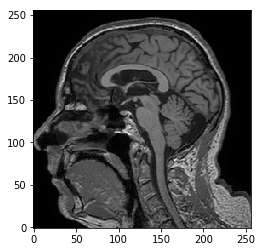

In [20]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data
show_slice(norm[:, :, 75])

0.8881349
-0.06467975
0.0


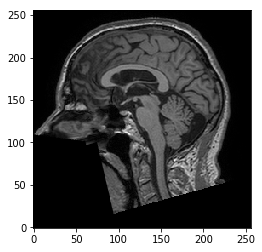

In [21]:
show_slice(def_data[:, :, 75])
print(np.max(mask_data))
print(np.min(mask_data))
print(len(np.where(mask_data == 1)[0])/np.prod(mask_data.shape))

(1, 160, 256, 256)
-0.06467975
0.8881349
-0.06467975


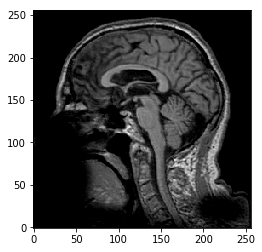

In [22]:
# Predicted
print(mask_data.shape)
mask_data = np.squeeze(mask_data)
mask_data = np.swapaxes(mask_data, 0, -1)
show_slice(mask_data[:, :, 75])
print(np.min(mask_data))
print(np.max(mask_data))
print(np.median(mask_data))
# print(np.percentile(pmask_data, 75))
# print(len(np.where(pmask_data == 1)[0]))

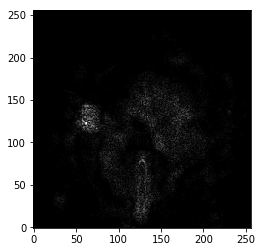

In [60]:
norm = norm_data
show_slice(norm)

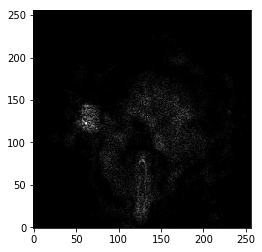

In [61]:
# Produce masked input via predicted mask
pred_applied_mask = np.multiply(normalizeImg(pmask_data[:, :, 0]), norm)


show_slice(pred_applied_mask)

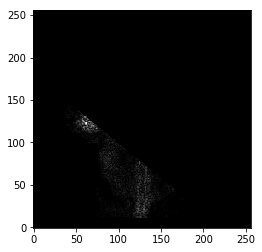

In [62]:
applied_mask = np.multiply(mask_data, norm)
show_slice(applied_mask)


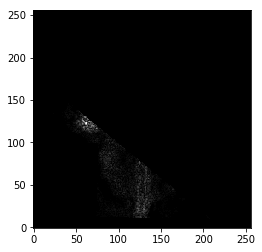

In [64]:
# Defaced
show_slice(def_data[:, :, 0])